<a href="https://colab.research.google.com/github/raphaelz306/DMC_Course/blob/main/Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Lectura de data
DATA = pd.read_csv('/content/DATA.csv')

In [ ]:
#Revisión de data
DATA.head()

In [ ]:
DATA.info()


In [49]:
#Dropeo de columnas no relevantes
col_drop = ['nombre_completo','motivo_salida']
DATA = DATA.drop(col_drop, axis=1)
DATA.head()

,num_documento,edad,Nro_reclamos_tri,sexo,est_civil,nse_agrup,ind_critico,region,ind_tenencia_hijos,ext_des_calificacion_sbs,num_polizas_vig,profesional,segmento_sbs,inter_servicio,historial_pagos,target
0,208265,50,4,MASCULINO,CASADO,B,NO,PROV. CONST. DEL CAL,0,DUDOSO,4,NO,Preferente,1,PUNTUAL,0
1,43839,43,0,FEMENINO,SOLTERO,B,NO,LIMA,0,DUDOSO,2,NO,Preferente,1,PUNTUAL,0
2,124251,24,0,MASCULINO,SOLTERO,B,NO,LIMA,0,DUDOSO,10,NO,NaN,2,PUNTUAL,0
3,119074,29,0,FEMENINO,SOLTERO,B,NO,MADRE DE DIOS,0,DUDOSO,5,NO,NaN,4,PUNTUAL,0
4,40000,20,0,MASCULINO,SOLTERO,B,NO,LIMA,0,DUDOSO,1,NO,Emprendedor,5,PUNTUAL,0


In [50]:
#Reclasificación de Variables Categóricas
categorical = ['sexo','est_civil','nse_agrup','ind_critico','region','ind_tenencia_hijos','ext_des_calificacion_sbs','profesional','segmento_sbs','historial_pagos']
DATA[categorical] = DATA[categorical].astype('category')

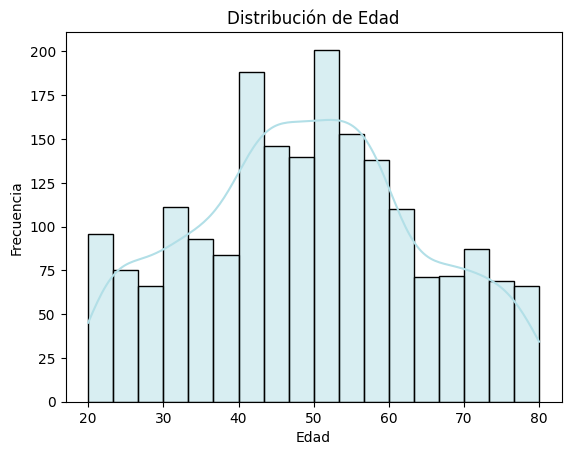

In [51]:
#Análisis descriptivo: EDAD
sns.histplot(data=DATA, x='edad', kde=True, color='#B2DFE7')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

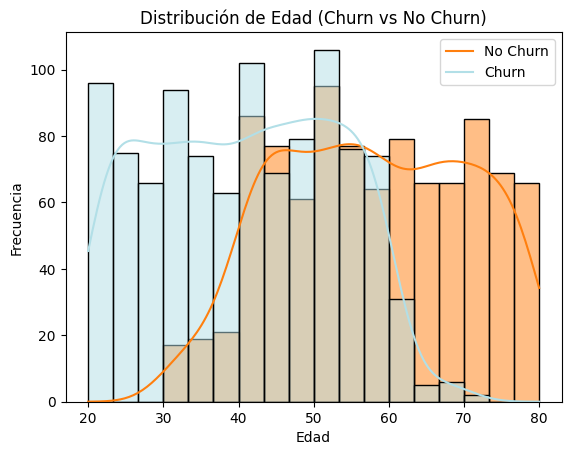

In [23]:
#Análisis descriptivo: FRECUENCIA DE CHURN DE ACUERDO A LA EDAD
sns.histplot(data=DATA, x='edad', hue='target', kde=True, palette=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de Edad (Churn vs No Churn)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

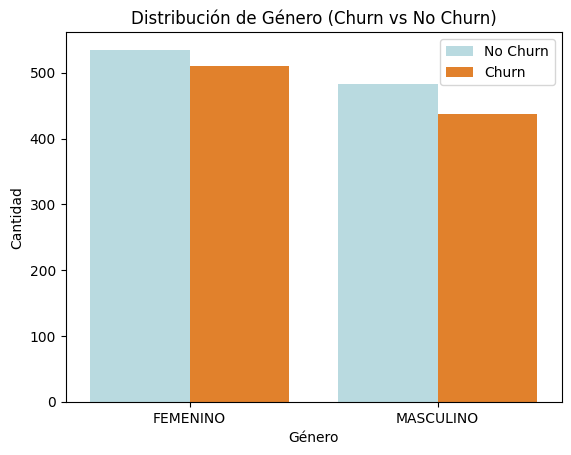

In [26]:
#Análisis descriptivo: Sexo vs Churn
sns.countplot(data=DATA, x='sexo', hue='target', palette=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de Género (Churn vs No Churn)')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

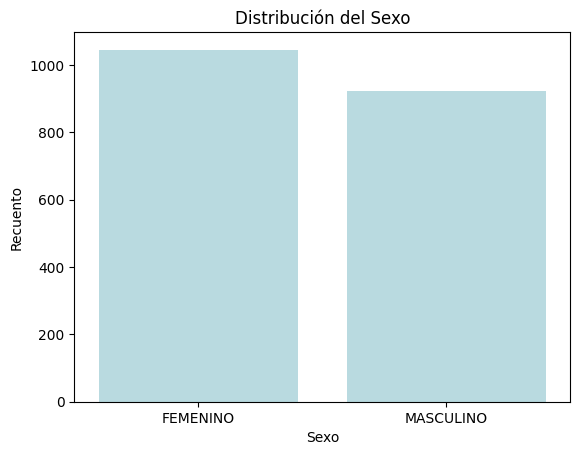

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los recuentos de las categorías de sexo
sexo_counts = DATA['sexo'].value_counts()

# Crear un gráfico de barras para la distribución del sexo
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, color='#B2DFE7')
plt.title('Distribución del Sexo')
plt.xlabel('Sexo')
plt.ylabel('Recuento')
plt.show()

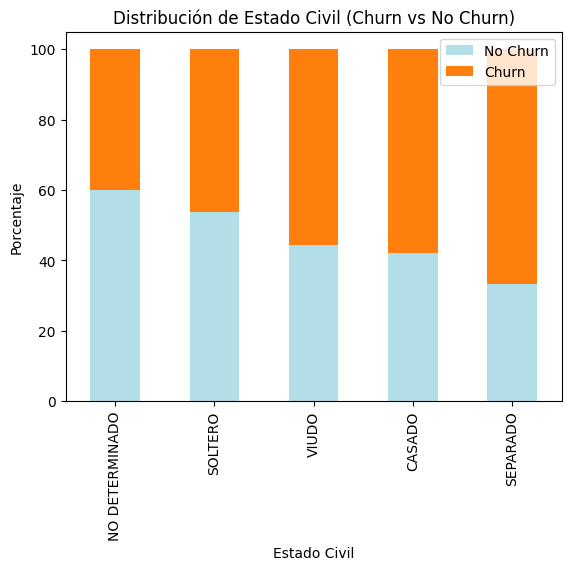

In [33]:
#Análisis descriptivo: EST CIVIL VS CHURN STACKED BARS
# Agrupar los datos por 'est_civil' y 'target' y contar las ocurrencias
grouped_data = DATA.groupby(['est_civil', 'target']).size().unstack()

# Calcular el total para cada categoría de 'est_civil'
grouped_data['Total'] = grouped_data.sum(axis=1)

# Reemplazar las categorías de 'target' si están escritas de manera diferente
DATA['target'] = DATA['target'].replace({0: 'No Churn', 1: 'Churn'})

# Agrupar los datos por 'est_civil' y 'target' y contar las ocurrencias
grouped_data = DATA.groupby(['est_civil', 'target']).size().unstack()

# Calcular el total para cada categoría de 'est_civil'
grouped_data['Total'] = grouped_data.sum(axis=1)

# Calcular los porcentajes para cada categoría de 'est_civil'
grouped_data['No Churn (%)'] = grouped_data['No Churn'] / grouped_data['Total'] * 100
grouped_data['Churn (%)'] = grouped_data['Churn'] / grouped_data['Total'] * 100

# Ordenar las categorías de 'est_civil' por el porcentaje de churn ascendente
grouped_data = grouped_data.sort_values(by='Churn (%)')

# Crear el gráfico de barras apiladas
ax = grouped_data[['No Churn (%)', 'Churn (%)']].plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de Estado Civil (Churn vs No Churn)')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()


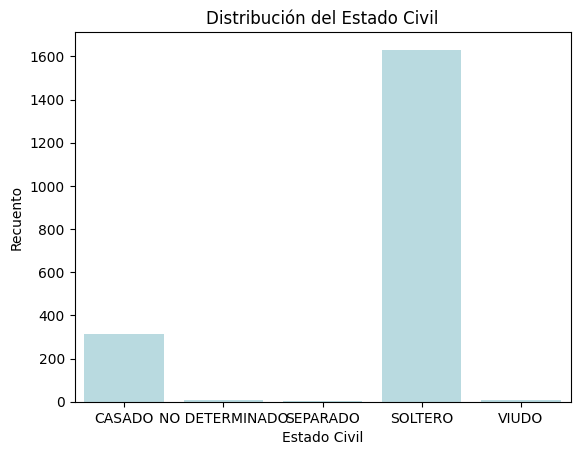

In [56]:
# Obtener los recuentos de las categorías de estado civil
estado_civil_counts = DATA['est_civil'].value_counts()

# Crear un gráfico de barras para la distribución del estado civil
sns.barplot(x=estado_civil_counts.index, y=estado_civil_counts.values, color='#B2DFE7')
plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Recuento')
plt.show()

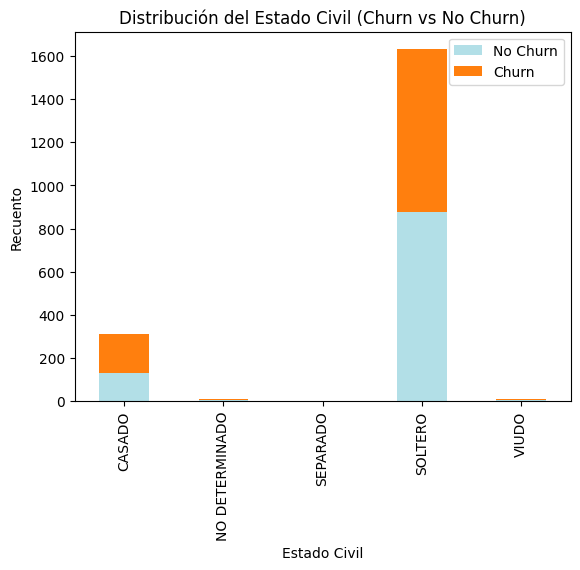

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los recuentos de las categorías de estado civil por churn y no churn
estado_civil_counts = DATA.groupby(['est_civil', 'target']).size().unstack()

# Crear un gráfico de barras para la distribución del estado civil
estado_civil_counts.plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución del Estado Civil (Churn vs No Churn)')
plt.xlabel('Estado Civil')
plt.ylabel('Recuento')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()


In [34]:
# Agrupar los datos por 'est_civil' y 'target' y contar las ocurrencias
grouped_data = DATA.groupby(['est_civil', 'target']).size().unstack()
grouped_data_GRAPH = grouped_data
# Agregar una columna adicional para el recuento total por estado civil
grouped_data['Total'] = grouped_data.sum(axis=1)

# Mostrar la tabla con el recuento de churn vs no churn por estado civil
print(grouped_data)

target          Churn  No Churn  Total
est_civil                             
CASADO            181       132    313
NO DETERMINADO      4         6     10
SEPARADO            2         1      3
SOLTERO           756       875   1631
VIUDO               5         4      9


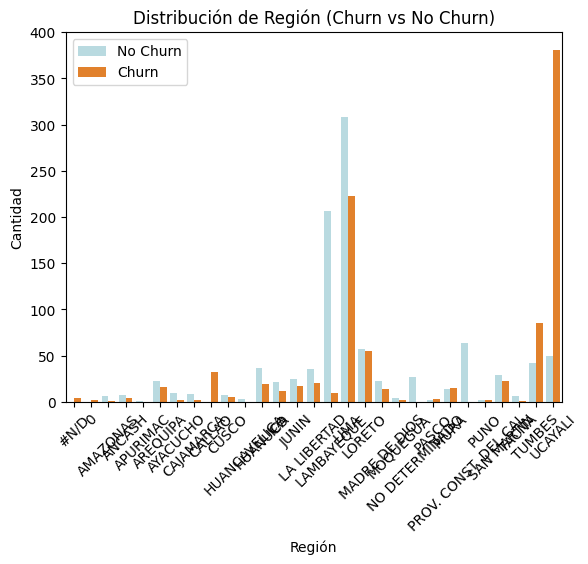

In [36]:
sns.countplot(data=DATA, x='region', hue='target', palette=['#B2DFE7', '#FF7F0E'])
plt.title('Distribución de Región (Churn vs No Churn)')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

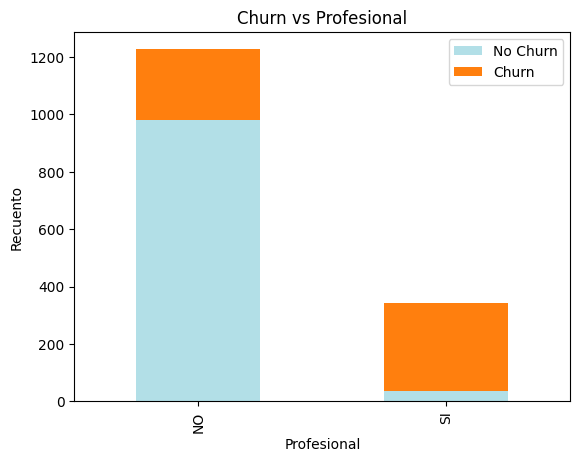

In [58]:
# Agrupar los datos por 'profesional' y 'target' y contar las ocurrencias
grouped_data = DATA.groupby(['profesional', 'target']).size().unstack()

# Crear el gráfico de barras apiladas
ax = grouped_data.plot(kind='bar', stacked=True, color=['#B2DFE7', '#FF7F0E'])
plt.title('Churn vs Profesional')
plt.xlabel('Profesional')
plt.ylabel('Recuento')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()

In [52]:
DATA.groupby('profesional')['profesional'].count()

profesional
NO    1225
SI     344
Name: profesional, dtype: int64